In [1]:
import json
import pandas as pd


In [2]:
# Convert to csv
# Commented out as its already been run
'''
from JSONtoCSV import convert_json_to_csv 
mouse_events_dataframe = convert_json_to_csv('mouse_events.json')
mouse_events_dataframe.head()
''';

In [3]:
# Load from csv
df = pd.read_csv('mouse_events.csv')
print(df.shape)
print(df.head)

(1293073, 9)
<bound method NDFrame.head of          Unnamed: 0  button      event_type  \
0                 0       1       mousedown   
1                 1       1         mouseup   
2                 2       1           click   
3                 3       1       mousedown   
4                 4       1  mousedirchange   
...             ...     ...             ...   
1293068     1293068       1           click   
1293069     1293069       1           click   
1293070     1293070       1           click   
1293071     1293071       1           click   
1293072     1293072       1           click   

                                                    target          time  \
0                                           alloc-slider-1  1.417182e+12   
1                                           alloc-slider-1  1.417182e+12   
2                                           alloc-slider-1  1.417182e+12   
3                                           alloc-slider-1  1.417182e+12   
4           

In [4]:
df_small = df.head(5000) # 'only' first 5,000 records

In [5]:
first_event = df_small.head(100) # 85 but wanted 1 extra
print(first_event.head())
print(first_event.tail())

Unnamed: 0  button      event_type          target          time      x  \
0           0       1       mousedown  alloc-slider-1  1.417182e+12  477.0   
1           1       1         mouseup  alloc-slider-1  1.417182e+12  478.0   
2           2       1           click  alloc-slider-1  1.417182e+12  478.0   
3           3       1       mousedown  alloc-slider-1  1.417182e+12  479.0   
4           4       1  mousedirchange  alloc-slider-1  1.417182e+12  543.0   

       y  step          turkId  
0  405.0     1  A35YFAFWP33C70  
1  405.0     1  A35YFAFWP33C70  
2  405.0     1  A35YFAFWP33C70  
3  405.0     1  A35YFAFWP33C70  
4  403.0     1  A35YFAFWP33C70  
    Unnamed: 0  button      event_type          target          time      x  \
95          95       1  mousedirchange  alloc-slider-3  1.417182e+12  446.0   
96          96       1  mousedirchange  alloc-slider-3  1.417182e+12  445.0   
97          97       1  mousedirchange  alloc-slider-3  1.417182e+12  443.0   
98          98      

Data time span is 41.718 s


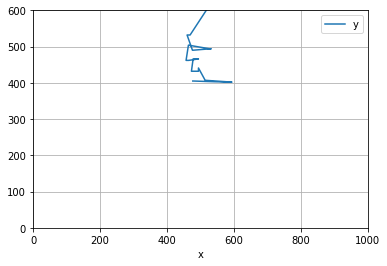

In [9]:
##Plot values https://datatofish.com/plot-dataframe-pandas/
timediff = first_event['time'][99] - first_event['time'][0]
print('Data time span is {} s'.format(timediff/1000))
first_event.plot(x ='x', y='y', kind = 'line', grid=True, xlim=[0,1000], ylim=[0,600])

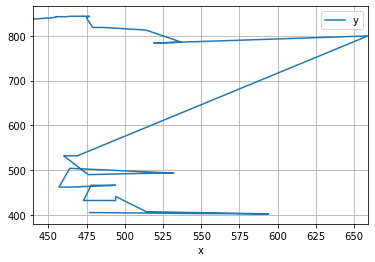

In [7]:
# With no limits on axes
first_event.plot(x ='x', y='y', kind = 'line', grid=True)

In [8]:
first_event.head(100)

,Unnamed: 0,button,event_type,target,time,x,y,step,turkId
0,0,1,mousedown,alloc-slider-1,1.417182e+12,477.0,405.0,1,A35YFAFWP33C70
1,1,1,mouseup,alloc-slider-1,1.417182e+12,478.0,405.0,1,A35YFAFWP33C70
2,2,1,click,alloc-slider-1,1.417182e+12,478.0,405.0,1,A35YFAFWP33C70
3,3,1,mousedown,alloc-slider-1,1.417182e+12,479.0,405.0,1,A35YFAFWP33C70
4,4,1,mousedirchange,alloc-slider-1,1.417182e+12,543.0,403.0,1,A35YFAFWP33C70
...,...,...,...,...,...,...,...,...,...
95,95,1,mousedirchange,alloc-slider-3,1.417182e+12,446.0,839.0,1,A35YFAFWP33C70
96,96,1,mousedirchange,alloc-slider-3,1.417182e+12,445.0,839.0,1,A35YFAFWP33C70
97,97,1,mousedirchange,alloc-slider-3,1.417182e+12,443.0,838.0,1,A35YFAFWP33C70
98,98,1,mousedirchange,alloc-slider-3,1.417182e+12,442.0,838.0,1,A35YFAFWP33C70
